#### SP Cashflow Modeling Presentation
---
#### Contents
- basic installment collateral cashflow forecast
- pass through
- warehouse structuring, scenario analysis, comprehensive analytics visuals
- securitization financing structuring, scenario analysis, comprehensive analytics visuals


In [32]:
from AssetModeling.Asset import Asset
from AssetModeling import AssetStore
from StructureModeling import StructureStore
from DealManager.DealManager import DealManager
from Utils.SPCFUtils import SPCFUtils
from tabulate import tabulate
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
tabulatePrint = lambda x: print(tabulate(x, headers='keys', tablefmt='psql'))

#### Single collateral modeling. show curves, metrics, yield table

In [2]:
asset1 = Asset(**AssetStore.ASSETSTORE['consumerLoan70'])

In [17]:

# tabulatePrint(asset1.getStaticMetrics()) # show static metric
# tabulatePrint(asset1.getDynamicMetrics(['cdrCurve','ltlCurve'])) # show curves
# tabulatePrint(asset1.calculateYieldTable(pxList = range(90,100))) # show yield talbe



+----+--------------+--------------------+
|    | matrics      | value              |
|----+--------------+--------------------|
|  0 | notional     | 1000000000.0       |
|  1 | wal          | 2.8189073052616025 |
|  2 | intRate      | 0.2                |
|  3 | term         | 70                 |
|  4 | intPmt       | 508827121.8388845  |
|  5 | prinPmt      | 834584000.0000006  |
|  6 | totalPmt     | 1330015438.2666132 |
|  7 | totalDefault | 179799999.9999999  |
|  8 | totalLoss    | 165416000.0000001  |
|  9 | cnl          | 0.1654160000000001 |
| 10 | cgl          | 0.1797999999999999 |
| 11 | lossTiming   | 25/25/25/12/7/6    |
+----+--------------+--------------------+
+----+------+----------+
|    |   px |    yield |
|----+------+----------|
|  0 |   90 | 0.174794 |
|  1 |   91 | 0.169314 |
|  2 |   92 | 0.163929 |
|  3 |   93 | 0.158636 |
|  4 |   94 | 0.153433 |
|  5 |   95 | 0.148316 |
|  6 |   96 | 0.143284 |
|  7 |   97 | 0.138333 |
|  8 |   98 | 0.133462 |
|  9 |   99 

#### ramp up portfolio and showing balance sheet build up and analytics

In [18]:
asset1.addRampSchedule(rampSchedule = "20 for 12", px = "100 for 6 98")

+----+----------------------+--------------+
|    | matrics              |        value |
|----+----------------------+--------------|
|  0 | purchasePeriod       | 24           |
|  1 | totalPurchaseBalance |  4.8e+08     |
|  2 | totalPurchaseBasis   |  4.752e+08   |
|  3 | avgPurchasePx        | 99           |
|  4 | peakBalance          |  3.87649e+08 |
|  5 | peakBalancePeriod    | 23           |
|  6 | wal                  |  3.77724     |
|  7 | breakevenPeriod      | 57           |
|  8 | totalPnL             |  1.63207e+08 |
|  9 | yield                |  0.128517    |
| 10 | moic                 |  1.34345     |
+----+----------------------+--------------+


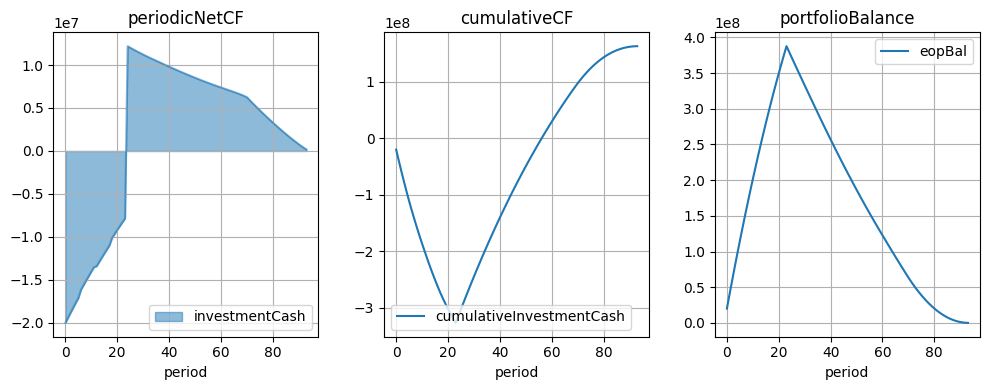

In [19]:
# show static metrices
print(tabulate(asset1.getStaticMetrics(ramp=True), headers='keys', tablefmt='psql'))

# show curves

figPageRamp, axPageRamp = plt.subplots(1,3, figsize=(10,4))
axPageRamp = axPageRamp.flatten()
for i, metrics in enumerate(['periodicNetCF','cumulativeCF','portfolioBalance']):
    df = asset1.getDynamicMetrics(metrics = metrics,ramp=True)
    if metrics == "periodicNetCF":
        df.plot.area(x = "period", ax = axPageRamp[i], grid = True, title=metrics, stacked = False)
    else:
        df.plot(x = "period", ax = axPageRamp[i], grid = True, title=metrics)

plt.tight_layout();plt.show()


#### Collateral scenarios. Static metrices and curves.

In [ ]:
deal1 = DealManager(dealName = "plainCollateralDeal",
                    dealDescriptive = {"dealSubsector":"consumer loan",
                                       "dealSector":"Consumer",
                                       "assetOriginator":"SuperLoan"                                       
                        },
                    dealMisc = {"upfrontFees": 1e6},
                    assetScenarios = {"base": AssetStore.ASSETSTORE['consumerLoan70']},
                    )
deal1.copyAssetWithNewAssumption("base", "frontLoad", {"defaultTimingCurve": SPCFUtils.timingCurveParse("32/32/15", term = 70)})
deal1.copyAssetWithNewAssumption("base", "backLoad", {"defaultTimingCurve": SPCFUtils.timingCurveParse("10/10/10", term = 70)})


+----+--------------+---------------------+---------------------+---------------------+
|    | matrics/px   | base                | frontLoad           | backLoad            |
|----+--------------+---------------------+---------------------+---------------------|
|  0 | notional     | 1000000000.0        | 1000000000.0        | 1000000000.0        |
|  1 | wal          | 2.8189073052616025  | 2.8395928351588364  | 2.7033896178799037  |
|  2 | intRate      | 0.2                 | 0.2                 | 0.2                 |
|  3 | term         | 70                  | 70                  | 70                  |
|  4 | intPmt       | 508827121.8388845   | 504580921.84713686  | 532441210.23601586  |
|  5 | prinPmt      | 834584000.0000006   | 834584000.0000024   | 835056770.9339803   |
|  6 | totalPmt     | 1330015438.2666132  | 1325882796.8801146  | 1353468981.2978215  |
|  7 | totalDefault | 179799999.9999999   | 179800000.00000006  | 179286118.55001947  |
|  8 | totalLoss    | 165416000.

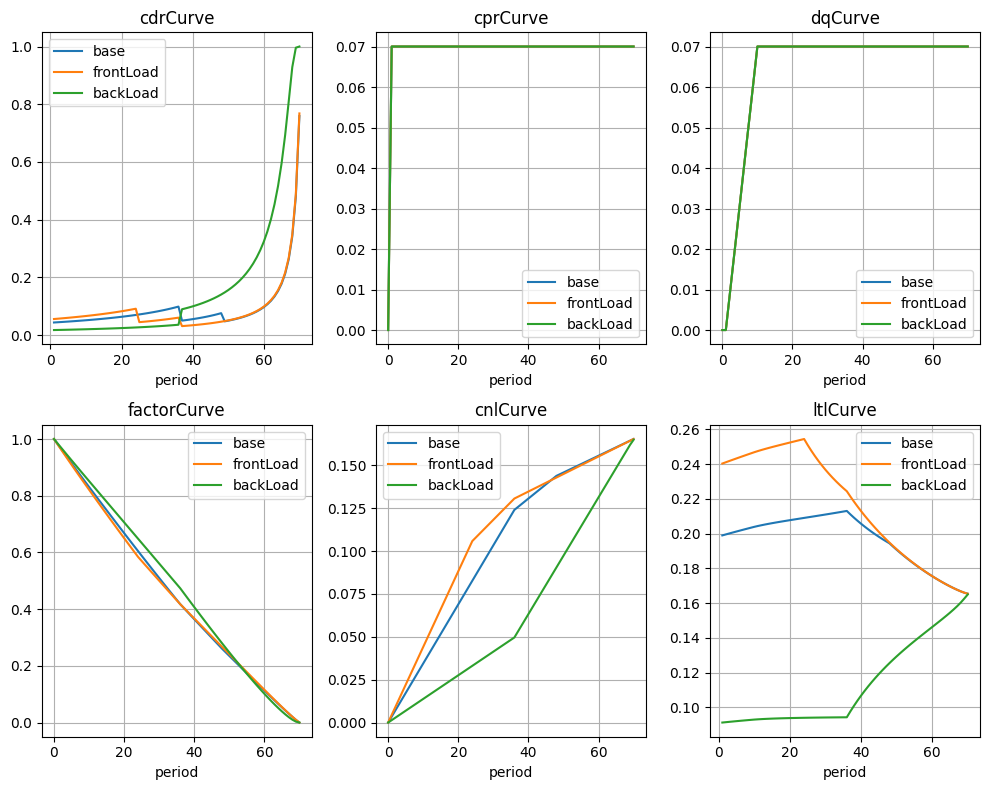

In [24]:
tabulatePrint(deal1.getAssetStaticMetrics(pxList = range(100, 89, -2))) # show static metrices
# show curves
figPageCollatCurve, axPageCollatCurve = plt.subplots(2,3, figsize=(10,8))
axPageCollatCurve = axPageCollatCurve.flatten()
for i, metrics in enumerate(['cdrCurve','cprCurve','dqCurve', 'factorCurve', 'cnlCurve', 'ltlCurve']):
    deal1.getAssetDynamicMetrics(metrics).plot(x = "period", ax = axPageCollatCurve[i], grid = True, title=metrics)

plt.tight_layout();plt.show()


#### Pass-through (0 adv rate ABS structure). Bake in deal fees, and show economics under different assumption

In [34]:


FinancingTerm = StructureStore.STRUCTURESTORE['PT']
deal2 = DealManager(dealName = "PTDeal",
                    dealDescriptive = {"dealSubsector":"subprime auto",
                                       "dealSector":"Consumer",
                                       "assetOriginator":"SuperLoan"                                       
                        },
                    dealMisc = {"upfrontFees": 1e6},
                    assetScenarios = {"base": AssetStore.ASSETSTORE['autoLoan45']},
                    financingTerms = FinancingTerm
                    )

deal2.copyAssetWithNewAssumption("base", "frontLoad", {"defaultTimingCurve": SPCFUtils.timingCurveParse("37/37/20", term = 45)})
deal2.copyAssetWithNewAssumption("base", "backLoad", {"defaultTimingCurve": SPCFUtils.timingCurveParse("10/10/10", term = 45)})
tabulatePrint(deal2.getAssetStaticMetrics())
print("*" * 150)
tabulatePrint(deal2.getStructureStaticMetrics())


No ramp schedule found. 100mm @ 100px provided
+----+--------------+---------------------+---------------------+---------------------+
|    | matrics/px   | base                | frontLoad           | backLoad            |
|----+--------------+---------------------+---------------------+---------------------|
|  0 | notional     | 1000000000.0        | 1000000000.0        | 1000000000.0        |
|  1 | wal          | 1.8437777000883526  | 1.8522501447993422  | 1.8401579171905282  |
|  2 | intRate      | 0.18                | 0.18                | 0.18                |
|  3 | term         | 45                  | 45                  | 45                  |
|  4 | intPmt       | 301056821.3737773   | 293896807.3897797   | 306057234.8275181   |
|  5 | prinPmt      | 934000000.0000008   | 934000000.0000045   | 935136656.1925654   |
|  6 | totalPmt     | 1225898462.847699   | 1218965357.5469053  | 1231877666.0492885  |
|  7 | totalDefault | 110000000.00000003  | 109999999.99999997  | 1081055

#### A/B cut. (70/30 ABS Structure). single tranche term ABS.

In [31]:


dealABCut = DealManager(dealName = "ABCutonConsumerLoan",
                    dealDescriptive = {"dealSubsector":"consumer loan",
                                       "dealSector":"Consumer",
                                       "assetOriginator":"SuperLoan"                                       
                        },
                    dealMisc = {"upfrontFees": 1e6},
                    assetScenarios = {"base": AssetStore.ASSETSTORE['consumerLoan58']},
                    financingTerms = StructureStore.STRUCTURESTORE['ABCut']
                    )

dealABCut.copyAssetWithNewAssumption("base", "frontLoad", {"defaultTimingCurve": SPCFUtils.timingCurveParse("50/35/10", term = 58)})
dealABCut.copyAssetWithNewAssumption("base", "backLoad", {"defaultTimingCurve": SPCFUtils.timingCurveParse("10/10/10", term = 58)})
dealABCut.addSeriesDefaultScenario(startingMultiple=1.0, endingMultiple=2.5, step=0.5)

tabulatePrint(dealABCut.getCapitalStack())
print("*" * 100)
tabulatePrint(dealABCut.getAssetStaticMetrics(pxList = range(100, 89, -5)))
print("*" * 100)
tabulatePrint(dealABCut.getStructureStaticMetrics())
print("*" * 100)
tabulatePrint(dealABCut.getAssetStaticMetrics(ramp = True))

# figPageCollat, axPageCollat = plt.subplots(2,3, figsize=(10,4))
# axPageCollat = axPageCollat.flatten()
# for i, metrics in enumerate(['cdrCurve','cprCurve','sevCurve','dqCurve','cnlCurve','factorCurve']):
#     df = dealABCut.getAssetDynamicMetrics(metrics)
#     df.plot(x = "period", ax = axPageCollat[i], grid = True, title=metrics)
# plt.tight_layout();plt.show()


No ramp schedule found. 100mm @ 100px provided
+----+---------+--------+----------+-----------+---------+-------------+
|    | class   |   size |   coupon |   advRate |     WAL | Paywindow   |
|----+---------+--------+----------+-----------+---------+-------------|
|  0 | A       |  7e+07 |     0.07 |        70 | 2.22123 | 1 - 57      |
+----+---------+--------+----------+-----------+---------+-------------+
****************************************************************************************************
+----+--------------+---------------------+---------------------+---------------------+---------------------+---------------------+-----------------------+----------------------+
|    | matrics/px   | base                | frontLoad           | backLoad            | base_1.0x           | base_1.5x           | base_2.0x             | base_2.5x            |
|----+--------------+---------------------+---------------------+---------------------+---------------------+--------------------

#### securitization financing structuring, scenario analysis, comprehensive analytics visuals

#### warehouse structuring, scenario analysis, comprehensive analytics visuals